# NBA SHOTS classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

First we import our data set and print it 

In [84]:
df = pd.read_csv(r"D:\dataFrames\shot_logs.csv")
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


We then want to check if we have any NaN to see how we deal with them 

In [85]:
df.isnull().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

We can see that all of our NaN are in the SHOT_CLOCK column so we will change it to 0 cause there was no time left on the clock 

In [86]:
df = df.fillna(df.SHOT_CLOCK.mean())
df.isnull().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

Let us get the data information

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

For classification we need a binary value so we will replace missed shots with 0 and made shots with 1

In [88]:
df = df.replace(["missed","made"],[0,1])
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.800000,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.400000,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,12.453344,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.300000,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.900000,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  128069 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [90]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,0.452139,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.636611,3.477760,3.043682,8.888964,0.441159,0.497706,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,2.000000,0.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.700000,2.000000,0.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,3.000000,1.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,1.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


we can see that the Touch_time column has a min value that is negative which is not possible

In [91]:
negative = df.loc[df["TOUCH_TIME"]<0]
negative.shape

(312, 21)

In [92]:
#we can see that we have 312 values that are negative, we will assign touch_time.mean() for the negative values
change_to = df.TOUCH_TIME.mean()
df.loc[(df.TOUCH_TIME < 0),'TOUCH_TIME'] = change_to
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.800000,2,...,7.7,2,1,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.400000,0,...,28.2,3,0,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,12.453344,3,...,10.1,2,0,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.300000,2,...,17.2,2,0,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.900000,2,...,3.7,2,0,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Lets try to determine what columns are usefull and what are not when trying to predict whether a shot went in or not, and skip the matchup column

first we will look at the shot number column and check what happens to the shot precentege as the player shoots more shots at the same game, and wil ldivide those by 10 shots, <10 , 10-20 , 20-30 , 30<

[45.44207177631645, 45.21390812764994, 45.21390812764994, 48.148148148148145]


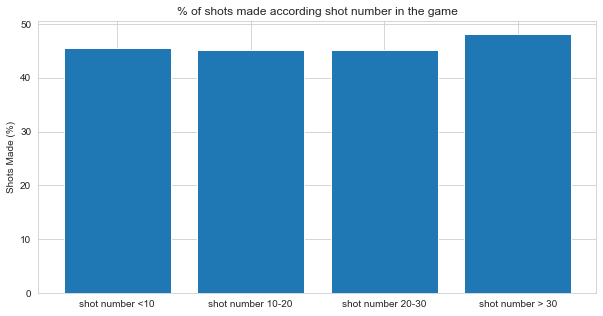

In [93]:
less_then_10 = df.loc[df["SHOT_NUMBER"] < 10]
between_10_20 = df.loc[(df["SHOT_NUMBER"] >= 10) & (df["SHOT_NUMBER"]) < 20]
between_20_30 = df.loc[(df["SHOT_NUMBER"] >= 20) & (df["SHOT_NUMBER"]) < 30]
more_then_30 = df.loc[df["SHOT_NUMBER"] > 30]
per_10 = less_then_10.loc[less_then_10["SHOT_RESULT"] == 1].shape[0]/less_then_10.shape[0]
per_10_20 = between_10_20.loc[between_10_20["SHOT_RESULT"] == 1].shape[0]/between_10_20.shape[0]
per_20_30 = between_20_30.loc[between_20_30["SHOT_RESULT"] == 1].shape[0]/between_20_30.shape[0]
per_30_plus = more_then_30.loc[more_then_30["SHOT_RESULT"] == 1].shape[0]/more_then_30.shape[0]
precentege = [per_10*100,per_10_20*100,per_20_30*100,per_30_plus*100]
plt.figure(figsize = [10,5])
shot_number = ['shot number <10','shot number 10-20','shot number 20-30','shot number > 30']
plt.bar(shot_number, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according shot number in the game")
print(precentege)
#as we can see the precentege of the shot going in goes up with the shot number, so we will keep those values

next we will look if the fact the team won the game or lost changes the result of the shot

[0.4769254586268287, 0.4269149573053534]


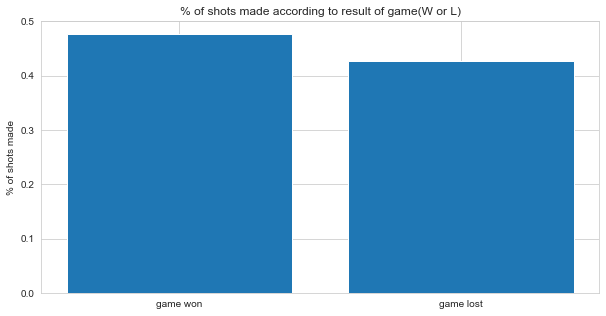

In [94]:
w_shots = df.loc[df["W"] == "W"]
l_shots = df.loc[df["W"] == 'L']
w_shots_per = w_shots.loc[w_shots["SHOT_RESULT"] == 1].shape[0]/w_shots.shape[0]
l_shots_per = l_shots.loc[l_shots["SHOT_RESULT"] == 1].shape[0]/l_shots.shape[0]
per_arr = [w_shots_per,l_shots_per]
plt.figure(figsize = [10,5])
plt.ylabel("% of shots made")
plt.title("% of shots made according to result of game(W or L)")
plt.bar(["game won","game lost"], height = per_arr)
print(per_arr)

as we see the result of the game changes the outcome, so we will keep this column and change it to numericl values(W = 0, L = 1)

next we will chack the final margin column, a close game is if the final margin was <5, then we will check the margin between 5-15, then 15-25 and then 25+

negative values in the margin column mean that the team lost by that amount, so we will check those too

Text(0.5, 1.0, '% of shots made according to game result and final margin')

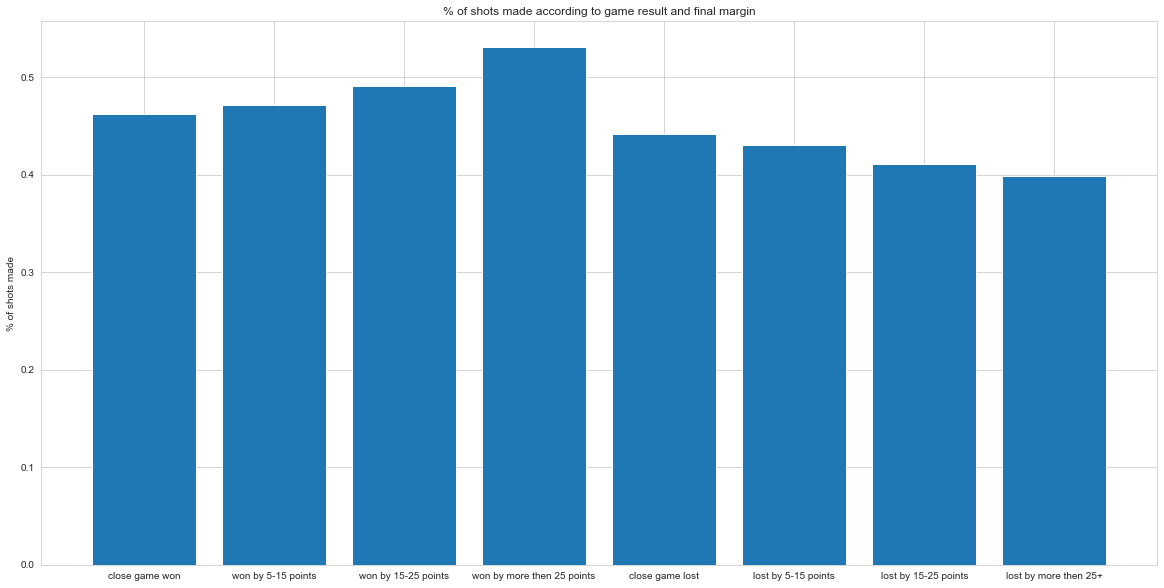

In [95]:
close_game_w = df.loc[(df["FINAL_MARGIN"] < 5) & (df["FINAL_MARGIN"] > 0)]
between_5_15_w = df.loc[(df["FINAL_MARGIN"] < 15) & (df["FINAL_MARGIN"] >= 5)]
between_15_25_w = df.loc[(df["FINAL_MARGIN"] < 25) & (df["FINAL_MARGIN"] >= 15)]
more_then_25_w = df.loc[(df["FINAL_MARGIN"] > 25)]
close_game_l = df.loc[(abs(df["FINAL_MARGIN"]) < 5) & (df["W"] == "L")]
between_5_15_l = df.loc[(abs(df["FINAL_MARGIN"]) < 15) & (abs(df["FINAL_MARGIN"]) >= 5) & (df["W"] == "L")]
between_15_25_l = df.loc[(abs(df["FINAL_MARGIN"]) < 25) & (abs(df["FINAL_MARGIN"]) >= 15) & (df["W"] == "L")]
more_then_25_l = df.loc[(df["FINAL_MARGIN"] < -25)]
per_1 = close_game_w.loc[close_game_w["SHOT_RESULT"] == 1].shape[0]/close_game_w.shape[0]
per_2 =  between_5_15_w.loc[between_5_15_w["SHOT_RESULT"] == 1].shape[0]/between_5_15_w.shape[0]
per_3 = between_15_25_w.loc[between_15_25_w["SHOT_RESULT"] == 1].shape[0]/between_15_25_w.shape[0]
per_4 = more_then_25_w.loc[more_then_25_w["SHOT_RESULT"] == 1].shape[0]/more_then_25_w.shape[0]
per_5 = close_game_l.loc[close_game_l["SHOT_RESULT"] == 1].shape[0]/close_game_l.shape[0]
per_6 = between_5_15_l.loc[between_5_15_l["SHOT_RESULT"] == 1].shape[0]/between_5_15_l.shape[0]
per_7 = between_15_25_l.loc[between_15_25_l["SHOT_RESULT"] == 1].shape[0]/between_15_25_l.shape[0]
per_8 = more_then_25_l.loc[more_then_25_l["SHOT_RESULT"] == 1].shape[0]/more_then_25_l.shape[0]
per_arr = [per_1,per_2,per_3,per_4,per_5,per_6,per_7,per_8]
xlabel = ["close game won","won by 5-15 points","won by 15-25 points","won by more then 25 points","close game lost","lost by 5-15 points", "lost by 15-25 points","lost by more then 25+"]
plt.figure(figsize = [20,10])
plt.bar(xlabel, height = per_arr)
plt.ylabel("% of shots made")
plt.title("% of shots made according to game result and final margin")

as we see there is a big difference, so we will leave it

Deleting all the columns that are not usefull when trying to determine whether a shot went in or not

we want to make it general and not by player, so all the columns according to players we will remove, and the FGM and POINTS columns are the shot_result and pts_type accordingly, so we can remove those as well

In [96]:
df = df.drop(columns = ["MATCHUP","player_name" ,"player_id", "CLOSEST_DEFENDER","CLOSEST_DEFENDER_PLAYER_ID","FGM","PTS"])
df.head()

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,21400899,A,W,24,1,1,1:09,10.800000,2,1.9,7.7,2,1,1.3
1,21400899,A,W,24,2,1,0:14,3.400000,0,0.8,28.2,3,0,6.1
2,21400899,A,W,24,3,1,0:00,12.453344,3,2.7,10.1,2,0,0.9
3,21400899,A,W,24,4,2,11:47,10.300000,2,1.9,17.2,2,0,3.4
4,21400899,A,W,24,5,2,10:34,10.900000,2,2.7,3.7,2,0,1.1


In [97]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
df["W"] = ohe.fit_transform(df[['W']])
df.head(10)

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,21400899,A,0.0,24,1,1,1:09,10.800000,2,1.9,7.7,2,1,1.3
1,21400899,A,0.0,24,2,1,0:14,3.400000,0,0.8,28.2,3,0,6.1
2,21400899,A,0.0,24,3,1,0:00,12.453344,3,2.7,10.1,2,0,0.9
3,21400899,A,0.0,24,4,2,11:47,10.300000,2,1.9,17.2,2,0,3.4
4,21400899,A,0.0,24,5,2,10:34,10.900000,2,2.7,3.7,2,0,1.1
5,21400899,A,0.0,24,6,2,8:15,9.100000,2,4.4,18.4,2,0,2.6
6,21400899,A,0.0,24,7,4,10:15,14.500000,11,9.0,20.7,2,0,6.1
7,21400899,A,0.0,24,8,4,8:00,3.400000,3,2.5,3.5,2,1,2.1
8,21400899,A,0.0,24,9,4,5:14,12.400000,0,0.8,24.6,3,0,7.3
9,21400890,H,0.0,1,1,2,11:32,17.400000,0,1.1,22.4,3,0,19.8


In [98]:
check = df.loc[df["W"] == 1]
check = check.loc[check["FINAL_MARGIN"] > 0]
check
# as we cann see all the loses are classified as 1

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST


In [99]:
check = df.loc[df["W"] == 0]
check = check.loc[check["FINAL_MARGIN"] < 0]
check
# as we cann see all the wins are classified as 0

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST


we will draw some stats to see if maybe we can drop a certin column

In [100]:
shots_home = df.loc[df["LOCATION"] == "H"]
shots_away = df.loc[df["LOCATION"] == "A"]
shots_home_made = shots_home.loc[shots_home["SHOT_RESULT"] == 1]
shots_away_made = shots_away.loc[shots_away["SHOT_RESULT"] == 1]
home_precentge = (shots_home_made.shape[0])/ shots_home.shape[0]
away_precentge = (shots_away_made.shape[0])/ shots_away.shape[0]
print(home_precentge)
print(away_precentge)
difference = abs(home_precentge - away_precentge)
print(difference)

0.45617355397753934
0.4481172526701489
0.008056301307390434


as we see there is not alot of difference between home and away games so we will drop this column ,
we will check the same for other columns that have a set number of options(period, shot type)

Text(0.5, 1.0, '% of shots made according to quarter')

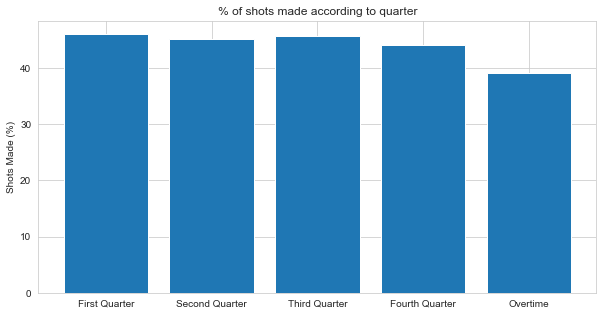

In [101]:
df = df.drop(columns = ["LOCATION"])
first_q = df.loc[df['PERIOD'] == 1]
second_q = df.loc[df['PERIOD'] == 2]
third_q = df.loc[df['PERIOD'] == 3]
fourth_q = df.loc[df['PERIOD'] == 4]
OT = df.loc[df['PERIOD'] == 5]
first_q_made = first_q.loc[first_q['SHOT_RESULT'] == 1]
second_q_made = second_q.loc[second_q['SHOT_RESULT'] == 1]
third_q_made = third_q.loc[third_q['SHOT_RESULT'] == 1]
fourth_q_made  = fourth_q .loc[fourth_q ['SHOT_RESULT'] == 1]
OT_made = OT.loc[OT['SHOT_RESULT'] == 1]
first_precentge = (first_q_made.shape[0])/(first_q.shape[0])
second_precentge = (second_q_made.shape[0])/(second_q.shape[0])
third_precentge = (third_q_made.shape[0])/(third_q.shape[0])
fourth_precentge = (fourth_q_made.shape[0])/(fourth_q.shape[0])
OT_precentge = (OT_made.shape[0])/(OT.shape[0])
precentege = [first_precentge*100,second_precentge*100,third_precentge*100,fourth_precentge*100,OT_precentge*100]
plt.figure(figsize = [10,5])
Quarter = ['First Quarter','Second Quarter','Third Quarter','Fourth Quarter','Overtime']
plt.bar(Quarter, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to quarter")

as we can see, there is a big drop in the shooting precentge the later into the game it was shot, so we will keep those columns

Text(0.5, 1.0, '% of shots made according to type')

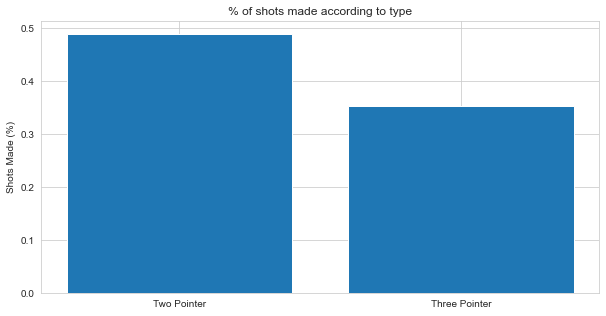

In [102]:
two_pointers = df.loc[df['PTS_TYPE'] == 2]
three_pointers = df.loc[df['PTS_TYPE'] == 3]
two_pointers_made = two_pointers.loc[two_pointers['SHOT_RESULT'] == 1]
three_pointers_made = three_pointers.loc[three_pointers['SHOT_RESULT'] == 1]
twos_precentege =(two_pointers_made.shape[0])/(two_pointers.shape[0]) 
threes_precentege =(three_pointers_made.shape[0])/(three_pointers.shape[0]) 
precentege = [twos_precentege,threes_precentege]
plt.figure(figsize = [10,5])
type_shot = ['Two Pointer','Three Pointer']
plt.bar(type_shot, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to type")

there is a huge diffrence between 3 point % and 2 point % so we wont drop those columns either

from what i have read, a player is defined as closely guarded when there is a defender which is less the 6 feet away from him, so we will change data acordibgly, if a player shoots while he is closely guarded we will classify that as 1, and if he is not closely guarded we will classify it as 0, and rename it accordingly

In [103]:
df.loc[(df.CLOSE_DEF_DIST < 6),'CLOSE_DEF_DIST']= int(1)
df.loc[(df.CLOSE_DEF_DIST >= 6),'CLOSE_DEF_DIST']= int(0)
df = df.rename(columns = {"CLOSE_DEF_DIST": "CLOSELY_GUARDED"})
df.head()

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED
0,21400899,0.0,24,1,1,1:09,10.800000,2,1.9,7.7,2,1,1.0
1,21400899,0.0,24,2,1,0:14,3.400000,0,0.8,28.2,3,0,0.0
2,21400899,0.0,24,3,1,0:00,12.453344,3,2.7,10.1,2,0,1.0
3,21400899,0.0,24,4,2,11:47,10.300000,2,1.9,17.2,2,0,1.0
4,21400899,0.0,24,5,2,10:34,10.900000,2,2.7,3.7,2,0,1.0


the difference in percentage is 0.678199706718613


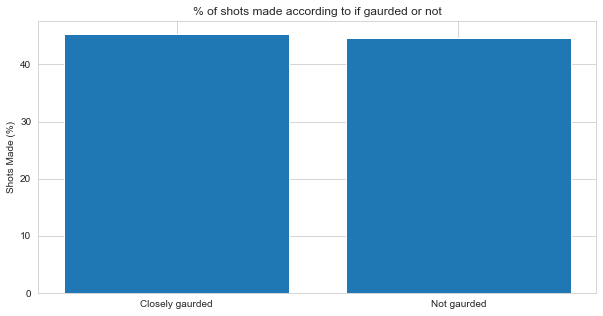

In [104]:
shots_gaurded = df.loc[df['CLOSELY_GUARDED'] == 1]
not_gaurded = df.loc[df['CLOSELY_GUARDED'] == 0]
gaurded_per = shots_gaurded.loc[shots_gaurded['SHOT_RESULT'] == 1].shape[0]/shots_gaurded.shape[0]
not_gaurded_per = not_gaurded.loc[not_gaurded['SHOT_RESULT'] == 1].shape[0]/not_gaurded.shape[0]
precentege = [gaurded_per *100 ,not_gaurded_per * 100]
plt.figure(figsize = [10,5])
type_shot = ['Closely gaurded','Not gaurded']
plt.bar(type_shot, height = precentege)
plt.ylabel("Shots Made (%)")
plt.title("% of shots made according to if gaurded or not")
diff = abs(gaurded_per - not_gaurded_per) * 100
print("the difference in percentage is " + str(diff))

as we can see there is not a lot of difference wheter a player was gaurded or not , so we will drop it before training

next lets check about the time left on the shot clock which goes down from 24 seconds in the nba, according to the internet, you should split it into 4 categories, 0-3 seconds left, 4-8 second left, 9-13 seconds left, 14+ second left

Text(0.5, 1.0, '% Of Shots Made According to time left on the shot clock')

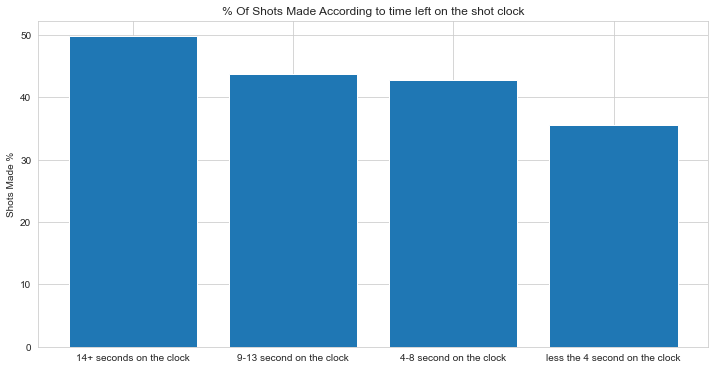

In [105]:
quick_possessions =  df.loc[df['SHOT_CLOCK'] >= 14] # 14+ seconds left
medium_possessions =df.loc[(df['SHOT_CLOCK'] < 14) &(df['SHOT_CLOCK'] >= 9)] # 9-13 seconds left
slow_possessions =  df.loc[(df['SHOT_CLOCK'] < 9) &(df['SHOT_CLOCK'] >= 4)] # 4-8 seconds left
late_possessions =  df.loc[df['SHOT_CLOCK'] < 4] # 0-3 seconds left
quick_possessions_made = quick_possessions.loc[quick_possessions["SHOT_RESULT"] == 1]
medium_possessions_made = medium_possessions.loc[medium_possessions["SHOT_RESULT"] == 1]
slow_possessions_made = slow_possessions.loc[slow_possessions["SHOT_RESULT"] == 1]
late_possessions_made = late_possessions.loc[late_possessions["SHOT_RESULT"] == 1]
quick_percentge = quick_possessions_made.shape[0]/quick_possessions.shape[0]
medium_percentge = medium_possessions_made.shape[0]/medium_possessions.shape[0]
slow_percentge = slow_possessions_made.shape[0]/slow_possessions.shape[0]
late_percentge = late_possessions_made.shape[0]/late_possessions.shape[0]
precentege = [quick_percentge*100,medium_percentge*100,slow_percentge*100,late_percentge*100]
plt.figure(figsize = [12,6])
plt.bar(x=['14+ seconds on the clock', '9-13 second on the clock','4-8 second on the clock','less the 4 second on the clock'], height=precentege)
plt.ylabel("Shots Made %")
plt.title("% Of Shots Made According to time left on the shot clock")

as we see there is a difference between the time on the shot clock left when shooting, so we will keep it,later on we will categorize it in the following way

possesion kind:

1. 14+ seconds on the clock- quick possesion
2. 9-13 second on the clock - medium possesion
3. 4-8 seocnds on the clock - long possesion
4. <4 second on the clock - late possesion

In [106]:
df.head()

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED
0,21400899,0.0,24,1,1,1:09,10.800000,2,1.9,7.7,2,1,1.0
1,21400899,0.0,24,2,1,0:14,3.400000,0,0.8,28.2,3,0,0.0
2,21400899,0.0,24,3,1,0:00,12.453344,3,2.7,10.1,2,0,1.0
3,21400899,0.0,24,4,2,11:47,10.300000,2,1.9,17.2,2,0,1.0
4,21400899,0.0,24,5,2,10:34,10.900000,2,2.7,3.7,2,0,1.0


In [107]:
#we will change the GAME_CLOCK columng to time in second so we will be able to use it as well
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))
df.head()

,GAME_ID,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSELY_GUARDED
0,21400899,0.0,24,1,1,69,10.800000,2,1.9,7.7,2,1,1.0
1,21400899,0.0,24,2,1,14,3.400000,0,0.8,28.2,3,0,0.0
2,21400899,0.0,24,3,1,0,12.453344,3,2.7,10.1,2,0,1.0
3,21400899,0.0,24,4,2,707,10.300000,2,1.9,17.2,2,0,1.0
4,21400899,0.0,24,5,2,634,10.900000,2,2.7,3.7,2,0,1.0


next we will split to shots according to distance from the basket (SHOT_DIST column)

we have 5 categories: 

1. close range shots (0-5 ft from basket)
2. short two's (6-11 ft from basket)
3. mid range (12-17 ft from basket)
4. long two's (18- 23 ft from the basket)
5. three pointers(23+ from the basket)

also need to look out for corner threes cause the distance is not more then 23 feet so we dont accidentely categorize them as long two's
we will also change the column name from SHOT_DIST to SHOT_TYPE

(array([32317., 22495., 10229., 15161., 21903., 25017.,   614.,   164.,
          120.,    49.]),
 array([ 0.  ,  4.72,  9.44, 14.16, 18.88, 23.6 , 28.32, 33.04, 37.76,
        42.48, 47.2 ]),
 <a list of 10 Patch objects>)

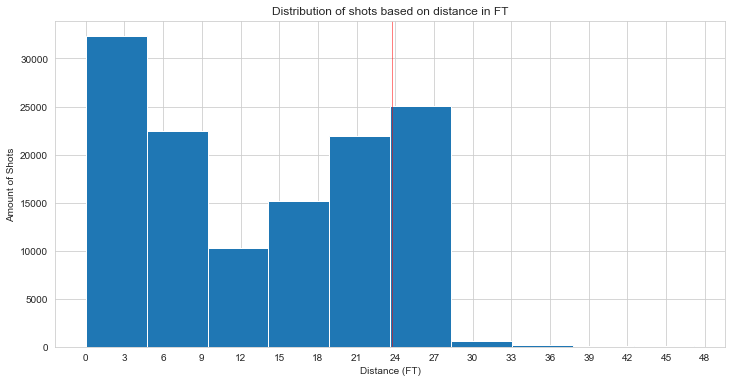

In [108]:
plt.figure(figsize = [12,6])
plt.title("Distribution of shots based on distance in FT")
plt.ylabel("Amount of Shots")
plt.xlabel("Distance (FT)")
plt.axvline(x=23.75, linewidth=0.5, color='r');
xtics = np.arange(0,50,3)
plt.xticks(xtics,xtics)
plt.hist(df.SHOT_DIST)

The red line represents the distance of the 3pt line, so shots to the right of the line are 3 Pointers, and we can we that way more 2 Pointers are taken

we also want to remove the outliers, in the distance case, shots from realy far way from the basket (30ft +) that went in

In [109]:
super_long = df.loc[df['SHOT_DIST'] >=30]
total = super_long.shape[0]
made = super_long.loc[super_long['SHOT_RESULT'] == 1].shape[0]
per = made/total
print(per*100)
print(total)
df = df[df.SHOT_DIST < 30]

9.35374149659864
588


as we see we have 588 shots from beyond 30 ft, and only 9% of them are going in, so we are going to remove them cause it can throw our model off a bit

Text(0.5, 1.0, '% of shot made according to type')

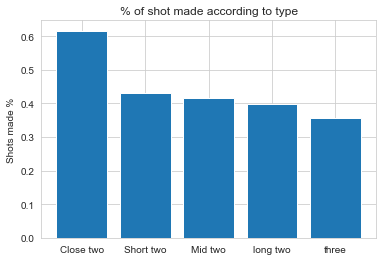

In [110]:
close_two = df.loc[(df.SHOT_DIST <= 5)]
short_two = df.loc[((df.SHOT_DIST <= 11) &(df.SHOT_DIST >5))]
mid_two = df.loc[((df.SHOT_DIST > 11) &(df.SHOT_DIST <= 17))]
long_two = df.loc[((df.SHOT_DIST > 17) &(df.SHOT_DIST <= 23.75) & (df.PTS_TYPE  == 2))]
three = df.loc[(df.PTS_TYPE == 3)]
close_per = close_two.loc[close_two['SHOT_RESULT'] == 1].shape[0]/close_two.shape[0]
short_per = short_two.loc[short_two['SHOT_RESULT'] == 1].shape[0]/short_two.shape[0]
mid_per = mid_two.loc[mid_two['SHOT_RESULT'] == 1].shape[0]/mid_two.shape[0]
long_per = long_two.loc[long_two['SHOT_RESULT'] == 1].shape[0]/long_two.shape[0]
three_per = three.loc[three['SHOT_RESULT'] == 1].shape[0]/three.shape[0]
per = [close_per,short_per,mid_per,long_per,three_per]
xlabels = ["Close two","Short two","Mid two","long two","three"]
plt.bar(x = xlabels,height = per)
plt.ylabel("Shots made %")
plt.title("% of shot made according to type")

Text(0.5, 1.0, '% of shots made based on time left in quarter')

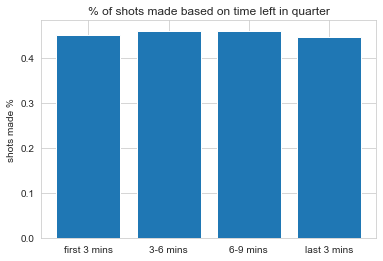

In [111]:
first_q = df.loc[df['GAME_CLOCK'] >= 540]
second_q = df.loc[(df['GAME_CLOCK'] < 540) & (df['GAME_CLOCK'] >= 360)]
third_q = df.loc[(df['GAME_CLOCK'] < 360) & (df['GAME_CLOCK'] >= 180)]
fourth_q = df.loc[(df['GAME_CLOCK'] < 180)]
first_q_per = first_q.loc[first_q['SHOT_RESULT'] == 1].shape[0]/first_q.shape[0]
second_q_per = second_q.loc[second_q['SHOT_RESULT'] == 1].shape[0]/second_q.shape[0]
third_q_per = third_q.loc[third_q['SHOT_RESULT'] == 1].shape[0]/third_q.shape[0]
fourth_q_per = fourth_q.loc[df['SHOT_RESULT'] == 1].shape[0]/fourth_q.shape[0]
precentege = [first_q_per,second_q_per,third_q_per,fourth_q_per]
x_bars = ['first 3 mins','3-6 mins','6-9 mins','last 3 mins']
plt.bar(x = x_bars, height = precentege)
plt.ylabel("shots made %")
plt.title("% of shots made based on time left in quarter")

as we see this doesnt change much, so we will drop this column


we can see that it is empty so that means that every shot has a type, next lets drop the shot_dist and shot_clock columns since we categorized it and the PTS_TYPE column

In [112]:
df = df.drop(columns = ["GAME_ID","PTS_TYPE","GAME_CLOCK","CLOSELY_GUARDED"])

In [113]:
df.head()

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
0,0.0,24,1,1,10.800000,2,1.9,7.7,1
1,0.0,24,2,1,3.400000,0,0.8,28.2,0
2,0.0,24,3,1,12.453344,3,2.7,10.1,0
3,0.0,24,4,2,10.300000,2,1.9,17.2,0
4,0.0,24,5,2,10.900000,2,2.7,3.7,0


In [114]:
df.describe()

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
count,127481.000000,127481.000000,127481.000000,127481.000000,127481.000000,127481.000000,127481.000000,127481.000000,127481.000000
mean,0.495391,0.213899,6.502969,2.469529,12.458421,2.025063,2.781177,13.471787,0.453793
std,0.499981,13.232030,4.711046,1.140099,5.637749,3.482676,2.986633,8.781947,0.497862
min,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.000000,3.000000,1.000000,8.400000,0.000000,0.900000,4.700000,0.000000
50%,0.000000,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.500000,0.000000
75%,1.000000,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,1.000000
max,1.000000,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,29.900000,1.000000


next lets see about dribbels, 0 dribbels means a catch and shoot, so this will be a category, and we will do every 1-10,11-20, 21+ dribbels as well

check we didnt count a shot twice or missed a shot

In [115]:
catch_shot = df.loc[df['DRIBBLES'] == 0]
low_dribbles = df.loc[(df['DRIBBLES'] >=1) & (df['DRIBBLES'] <=10)]
med_dribbles = df.loc[(df['DRIBBLES'] >=11) & (df['DRIBBLES']<= 20)]
high_dribbles = df.loc[df['DRIBBLES'] > 20]
print(catch_shot.shape[0])
print(low_dribbles.shape[0])
print(med_dribbles.shape[0])
print(high_dribbles.shape[0])
print(df.shape[0])
print(catch_shot.shape[0]+low_dribbles.shape[0]+med_dribbles.shape[0]+high_dribbles.shape[0])

62984
59422
4568
507
127481
127481


now lets check the shot % based on amount of dribbles

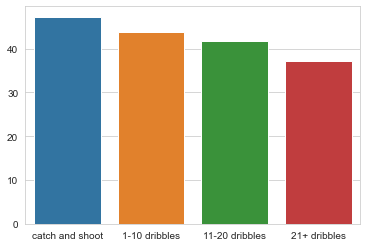

In [116]:
catch_per = catch_shot.loc[catch_shot['SHOT_RESULT'] ==1].shape[0]/catch_shot.shape[0]
low_per = low_dribbles.loc[low_dribbles['SHOT_RESULT'] ==1].shape[0]/low_dribbles.shape[0]
med_per = med_dribbles.loc[med_dribbles['SHOT_RESULT'] ==1].shape[0]/med_dribbles.shape[0]
high_per = high_dribbles.loc[high_dribbles['SHOT_RESULT'] ==1].shape[0]/high_dribbles.shape[0]
per_arr = [catch_per*100,low_per*100,med_per*100,high_per*100]
xlabels = ["catch and shoot","1-10 dribbles","11-20 dribbles","21+ dribbles"]
sns.set_style("whitegrid")
ax = sns.barplot(y = per_arr, x = xlabels)

In [117]:
print(high_per)
print(high_dribbles.shape[0])
print(med_per)
print(med_dribbles.shape[0])
print(low_per)
print(low_dribbles.shape[0])
print(catch_per)
print(catch_shot.shape[0])

0.3708086785009862
507
0.4176882661996497
4568
0.4369762040994918
59422
0.4729455099707862
62984


we can see that as the player dribbles more, there is a bigger chance he will miss, but we also see that 96% of the shots taken were either catch and shoot situations or 1-10 dribbles so the big drop is only for a small amount of percentege of shots so we will remove all the shots with 21+ dribbles since it will move our model to fit these shots, and they represent 
0.4% of our shots

now we will get our data ready to use in the clasifer, first we need to get our target array and then remove the shot_result column

In [118]:
df = df[df.DRIBBLES <= 20]
df.describe()

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
count,126974.000000,126974.000000,126974.000000,126974.000000,126974.000000,126974.000000,126974.000000,126974.000000,126974.000000
mean,0.496015,0.199395,6.488887,2.468127,12.485933,1.940941,2.714758,13.467838,0.454124
std,0.499986,13.234296,4.699159,1.139787,5.627748,3.221703,2.797926,8.783883,0.497893
min,0.000000,-53.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.000000,3.000000,1.000000,8.500000,0.000000,0.900000,4.700000,0.000000
50%,0.000000,1.000000,5.000000,2.000000,12.453344,1.000000,1.600000,13.500000,0.000000
75%,1.000000,9.000000,9.000000,3.000000,16.400000,2.000000,3.700000,22.500000,1.000000
max,1.000000,53.000000,38.000000,7.000000,24.000000,20.000000,23.200000,29.900000,1.000000


last lets check the touch_time column, we will split it to 4 categories, 0-6 second,6-12,12-18,18-24

Text(0.5, 1.0, '% of shots made based on time dribbeling')

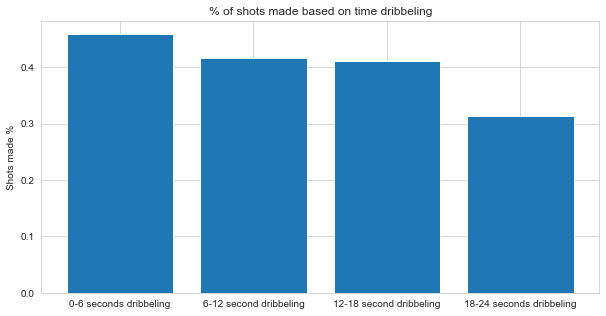

In [119]:
short_touch = df.loc[df["TOUCH_TIME"] < 6]
med_touch = df.loc[(df["TOUCH_TIME"] >= 6) & (df["TOUCH_TIME"] < 12)]
long_touch = df.loc[(df["TOUCH_TIME"] >= 12) & (df["TOUCH_TIME"] < 18)]
super_long_touch = df.loc[(df["TOUCH_TIME"] >= 18) & (df["TOUCH_TIME"] < 24)]
short_per = short_touch.loc[short_touch["SHOT_RESULT"] == 1].shape[0]/short_touch.shape[0]
med_per = med_touch.loc[med_touch["SHOT_RESULT"] == 1].shape[0]/med_touch.shape[0]
long_per = long_touch.loc[long_touch["SHOT_RESULT"] == 1].shape[0]/long_touch.shape[0]
sLong_per = super_long_touch.loc[super_long_touch["SHOT_RESULT"] == 1].shape[0]/super_long_touch.shape[0]
per = [short_per,med_per,long_per,sLong_per ]
xlabels =["0-6 seconds dribbeling","6-12 second dribbeling","12-18 second dribbeling","18-24 seconds dribbeling"]
plt.figure(figsize = [10,5])
plt.bar(x = xlabels,height = per)
plt.ylabel("Shots made %")
plt.title("% of shots made based on time dribbeling")

as we see the longer the player is dribbeling, his % of making his shot drops, but we will see how much we have of each category to wee if we can remove the outliers

In [120]:
print(short_per)
print(short_touch.shape[0])
print(med_per)
print(med_touch.shape[0])
print(long_per)
print(long_touch.shape[0])
print(sLong_per)
print(super_long_touch.shape[0])

0.45912173271594514
112517
0.41725921137685845
12376
0.41026970954356845
1928
0.3137254901960784
153


as we see we only have 153 shots with more then 18 second of dribbeling, which is 0.1% of our total shots, and beaucse they have a very low precentege, it will also lower the model down, so we will remove those as well

In [121]:
df = df[df["TOUCH_TIME"] < 18]
df

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,SHOT_RESULT
0,0.0,24,1,1,10.800000,2,1.9,7.7,1
1,0.0,24,2,1,3.400000,0,0.8,28.2,0
2,0.0,24,3,1,12.453344,3,2.7,10.1,0
3,0.0,24,4,2,10.300000,2,1.9,17.2,0
4,0.0,24,5,2,10.900000,2,2.7,3.7,0
...,...,...,...,...,...,...,...,...,...
128064,1.0,-16,5,3,18.300000,5,6.2,8.7,0
128065,1.0,-16,6,4,19.800000,4,5.2,0.6,1
128066,1.0,-16,7,4,23.000000,2,4.2,16.9,1
128067,1.0,-16,8,4,9.100000,4,4.5,18.3,0


In [122]:
df.reset_index(drop=True, inplace=True)
target = df.SHOT_RESULT
df = df.drop(columns = ["SHOT_RESULT"])
print(target)
print(type(target))
target = target.to_numpy()

0         1
1         0
2         0
3         0
4         0
         ..
126816    0
126817    1
126818    1
126819    0
126820    1
Name: SHOT_RESULT, Length: 126821, dtype: int64
<class 'pandas.core.series.Series'>


now we need to set an array of arrays that will hold our data for each shot and reindex our dataframe cause we dropped some rows

i will build 2 models, 1 where i categorize the some of the data to groups and the other where i leave it as is, first we will do the second option

In [123]:
df.head()

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST
0,0.0,24,1,1,10.800000,2,1.9,7.7
1,0.0,24,2,1,3.400000,0,0.8,28.2
2,0.0,24,3,1,12.453344,3,2.7,10.1
3,0.0,24,4,2,10.300000,2,1.9,17.2
4,0.0,24,5,2,10.900000,2,2.7,3.7


In [124]:
data = np.zeros((df.shape[0],8))
for i in range(len(data)):
    data[i][0] = df.loc[i].W
    data[i][1] = df.loc[i].FINAL_MARGIN
    data[i][2] = df.loc[i].SHOT_NUMBER
    data[i][3] = df.loc[i].PERIOD
    data[i][4] = df.loc[i].SHOT_CLOCK
    data[i][5] = df.loc[i].DRIBBLES
    data[i][6] = df.loc[i].TOUCH_TIME
    data[i][7] = df.loc[i].SHOT_DIST

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

after we worked on the data, its time to start splitting it and using sklearn models on it,first we will run on a loop to check for the most optimal n in knn model, and since we have a lot of sampels, we will check between 200 and 300, and also try to use the train-test split, since we have a lot of rows, a test size of 0.05 will be enough

In [126]:
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size = 0.05, random_state=10)

k_range = list(range(200,300))
k_scores = []
k_confusion = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(k)
    knn.fit(data_train, target_train)
    pred = knn.predict(data_test)
    score = metrics.accuracy_score(target_test, pred)
    confusion = metrics.confusion_matrix(target_test, pred)
    k_scores.append(score)
    k_confusion.append(confusion)

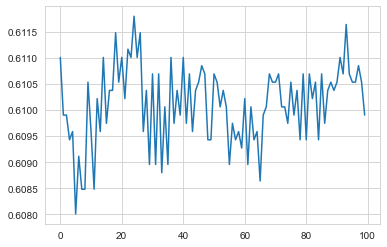

In [127]:
plt.plot(k_scores)

as we see it all has around the same accuracy, lets check the confusion matrix averages

In [158]:
TP = 0
FP =0 
TN = 0
FN = 0
for i in range(len(k_confusion)):
    TP = TP + k_confusion[i][1, 1]
    FP = FP + k_confusion[i][0, 1]
    TN = TN + k_confusion[i][0, 0]
    FN = FN + k_confusion[i][1, 0]

In [159]:
print(max(k_scores))
print(k_scores[24])

0.6117943866288237
0.6117943866288237


we can see that k_scores[24] is our max accuracy, so will check every thing acording to k = 224

In [160]:
TPmean = TP/100
FPmean = FP/100
TNmean = TN/100
FNmean = FN/100
print("average of true positive: " + str(TPmean))
print("average of true negative: " + str(TNmean))
print("average of false positive: " + str(FPmean))
print("average of false negative: " + str(FNmean))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data_train, target_train)
pred = knn.predict(data_test)
print("accuracy =" + str(metrics.accuracy_score(target_test, pred)))#check the best k and print
print("recall = " + str(metrics.recall_score(target_test, pred)))
print("presicion = " + str(metrics.precision_score(target_test, pred)))

average of true positive: 1112.44
average of true negative: 2756.92
average of false positive: 734.08
average of false negative: 1738.56
accuracy =0.6099022390413119
recall = 0.38933707471062784
presicion = 0.6022788931090614


now lets check with a couple of dummies

[0.5504572690003153, 0.5075685903500473, 0.5023651844843898]


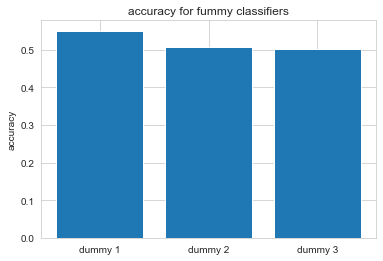

In [161]:
from sklearn.dummy import DummyClassifier
dummy_scores = []
dummy_confusion = []

dummy_1 = DummyClassifier(strategy="most_frequent")
dummy_1.fit(data_train, target_train)
pred_dummy_1 = dummy_1.predict(data_test)
dummy_scores.append(metrics.accuracy_score(target_test, pred_dummy_1))
confusion = metrics.confusion_matrix(target_test, pred_dummy_1)
dummy_confusion.append(confusion)

dummy_2 = DummyClassifier(strategy = "stratified")
dummy_2.fit(data_train, target_train)
pred_dummy_2 = dummy_2.predict(data_test)
dummy_scores.append(metrics.accuracy_score(target_test, pred_dummy_2))
confusion = metrics.confusion_matrix(target_test, pred_dummy_2)
dummy_confusion.append(confusion)

dummy_3 = DummyClassifier(strategy = "uniform")
dummy_3.fit(data_train, target_train)
pred_dummy_3 = dummy_3.predict(data_test)
dummy_scores.append(metrics.accuracy_score(target_test, pred_dummy_3))
confusion = metrics.confusion_matrix(target_test, pred_dummy_3)
dummy_confusion.append(confusion)

xlables = ["dummy 1","dummy 2","dummy 3"]
plt.ylabel("accuracy")
plt.title("accuracy for fummy classifiers")
plt.bar(xlables,height = dummy_scores)
print(dummy_scores)

In [154]:
dummy_confusion

[array([[3491,    0],
        [2851,    0]], dtype=int64),
 array([[1884, 1607],
        [1533, 1318]], dtype=int64),
 array([[1734, 1757],
        [1412, 1439]], dtype=int64)]

In [165]:
TP = 0
FP =0 
TN = 0
FN = 0
for i in range(len(dummy_confusion)):
    TP = TP + dummy_confusion[i][1, 1]
    FP = FP + dummy_confusion[i][0, 1]
    TN = TN + dummy_confusion[i][0, 0]
    FN = FN + dummy_confusion[i][1, 0]
TPmean = TP/len(dummy_confusion)
FPmean = FP/len(dummy_confusion)
TNmean = TN/len(dummy_confusion)
FNmean = FN/len(dummy_confusion)
print("average of true positive: " + str(TPmean))
print("average of true negative: " + str(TNmean))
print("average of false positive: " + str(FPmean))
print("average of false negative: " + str(FNmean))

average of true positive: 895.3333333333334
average of true negative: 2403.3333333333335
average of false positive: 1087.6666666666667
average of false negative: 1955.6666666666667


now we will categorize shot_dist and game_clock to groups like this

possesion kind:

1. 14+ seconds on the clock- quick possesion
2. 9-13 second on the clock - medium possesion
3. 4-8 seocnds on the clock - long possesion
4. <4 second on the clock - late possesion

1. close range shots (0-5 ft from basket)
2. short two's (6-11 ft from basket)
3. mid range (12-17 ft from basket)
4. long two's (18- 23 ft from the basket)
5. three pointers(23+ from the basket)

In [167]:
df.loc[(df.SHOT_DIST <= 5),'SHOT_DIST'] = 1
df.loc[((df.SHOT_DIST <= 11) &(df.SHOT_DIST >5)),'SHOT_DIST'] = 2
df.loc[((df.SHOT_DIST > 11) &(df.SHOT_DIST <= 17)),'SHOT_DIST'] = 3
df.loc[((df.SHOT_DIST > 17) &(df.SHOT_DIST <= 23.75)) ,'SHOT_DIST'] = 4
df.loc[(df.SHOT_DIST > 23.75), 'SHOT_DIST'] = 5
df.loc[(df.SHOT_CLOCK <= 4),'SHOT_CLOCK'] = 4
df.loc[((df.SHOT_CLOCK <= 9) &(df.SHOT_CLOCK >4)),'SHOT_CLOCK'] = 3
df.loc[((df.SHOT_CLOCK > 9) &(df.SHOT_CLOCK <= 14)),'SHOT_CLOCK'] = 2
df.loc[(df.SHOT_CLOCK > 14),'SHOT_CLOCK'] = 1

In [171]:
df = df.rename(columns = {"SHOT_DIST":"SHOT_TYPE","SHOT_CLOCK":"POS_TYPE"})
df.head()

,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,POS_TYPE,DRIBBLES,TOUCH_TIME,SHOT_TYPE
0,0.0,24,1,1,2.0,2,1.9,1.0
1,0.0,24,2,1,4.0,0,0.8,5.0
2,0.0,24,3,1,2.0,3,2.7,1.0
3,0.0,24,4,2,2.0,2,1.9,4.0
4,0.0,24,5,2,2.0,2,2.7,1.0


In [172]:
data = np.zeros((df.shape[0],8))
for i in range(len(data)):
    data[i][0] = df.loc[i].W
    data[i][1] = df.loc[i].FINAL_MARGIN
    data[i][2] = df.loc[i].SHOT_NUMBER
    data[i][3] = df.loc[i].PERIOD
    data[i][4] = df.loc[i].POS_TYPE
    data[i][5] = df.loc[i].DRIBBLES
    data[i][6] = df.loc[i].TOUCH_TIME
    data[i][7] = df.loc[i].SHOT_TYPE

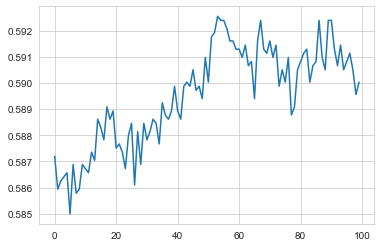

In [173]:
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size = 0.05, random_state=10)

k_range = list(range(200,300))
k_scores = []
k_confusion = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train, target_train)
    pred = knn.predict(data_test)
    score = metrics.accuracy_score(target_test, pred)
    confusion = metrics.confusion_matrix(target_test, pred)
    k_scores.append(score)
    k_confusion.append(confusion)
plt.plot(k_scores)

In [174]:
TP = 0
FP =0 
TN = 0
FN = 0
for i in range(len(k_confusion)):
    TP = TP + k_confusion[i][1, 1]
    FP = FP + k_confusion[i][0, 1]
    TN = TN + k_confusion[i][0, 0]
    FN = FN + k_confusion[i][1, 0]
TPmean = TP/100
FPmean = FP/100
TNmean = TN/100
FNmean = FN/100
print("average on true positive: " + str(TPmean))
print("average on true negative: " + str(TNmean))
print("average on false positive: " + str(FPmean))
print("average on false negative: " + str(FNmean))
#print("accuracy =" + str(metrics.accuracy_score(target_test, pred)))#check the best k and print
#print("recall = " + str(metrics.recall_score(target_test, pred)))
#print("presicion = " + str(metrics.precision_score(target_test, pred)))

average on true positive: 1121.98
average on true negative: 2616.83
average on false positive: 874.17
average on false negative: 1729.02
accuracy =0.5900346893724377
recall = 0.39459838653104173
presicion = 0.5627813906953477


let us get all the predicted probabilities for if the shot went in

In [296]:
pred_prob_all = knn.predict_proba(data_test)[:,1]

Text(0, 0.5, 'Frequency')

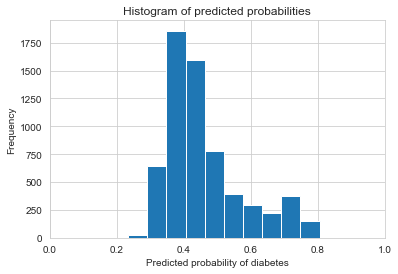

In [297]:
plt.hist(pred_prob_all)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [324]:
from sklearn.preprocessing import binarize
pred = binarize([pred_prob_all],threshold= 0.47)[0]

In [ ]:
print(metrics.confusion_matrix(target_test,pred))

after trying to optimize the data in a way to make most from the knn clafifier, i cam to a conclusion that this model isnt fit to predict what i chose to predict, because sometimes a shot shouldent go in, but it does, so i will try to work on another type of classifier.